In [59]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [60]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#Data

This synthetic dataset contains information on 10,000 individuals and explores the relationship between age, occupation, daily time allocation (work, rest, sleep, exercise) and longevity. The data is designed to support regression modeling and analysis of how lifestyle choices impact lifespan.

The dataset captures realistic patterns where daily activities sum to approximately 24 hours, and includes outliers representing extreme work or rest patterns. This makes it ideal for exploring non-linear relationships and diminishing returns in health outcomes.

https://www.kaggle.com/datasets/oluwatosinadewale/quality-of-life-data

In [61]:
df = pd.read_csv('Data Path')

In [62]:
df.head()

,id,gender,occupation_type,avg_work_hours_per_day,avg_rest_hours_per_day,avg_sleep_hours_per_day,avg_exercise_hours_per_day,age_at_death
0,10001,Female,Teacher,6.60,10.92,5.38,1.10,88
1,10002,Male,Office Worker,9.65,7.65,6.31,0.39,76
2,10003,Female,Manager,13.77,1.00,8.02,1.21,78
3,10004,Female,Freelancer,10.94,5.18,7.59,0.29,74
4,10005,Male,Engineer,9.81,5.11,7.38,1.70,78


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          10000 non-null  int64  
 1   gender                      10000 non-null  object 
 2   occupation_type             10000 non-null  object 
 3   avg_work_hours_per_day      10000 non-null  float64
 4   avg_rest_hours_per_day      10000 non-null  float64
 5   avg_sleep_hours_per_day     10000 non-null  float64
 6   avg_exercise_hours_per_day  10000 non-null  float64
 7   age_at_death                10000 non-null  int64  
dtypes: float64(4), int64(2), object(2)
memory usage: 625.1+ KB


##Dropping ID

In [64]:
df = df.drop(columns =["id"], axis = 1)

In [65]:
df.head()

,gender,occupation_type,avg_work_hours_per_day,avg_rest_hours_per_day,avg_sleep_hours_per_day,avg_exercise_hours_per_day,age_at_death
0,Female,Teacher,6.60,10.92,5.38,1.10,88
1,Male,Office Worker,9.65,7.65,6.31,0.39,76
2,Female,Manager,13.77,1.00,8.02,1.21,78
3,Female,Freelancer,10.94,5.18,7.59,0.29,74
4,Male,Engineer,9.81,5.11,7.38,1.70,78


#Occupation, Gender Label Encoding

In [69]:
from sklearn.preprocessing import LabelEncoder

In [70]:
le_gender = LabelEncoder()
le_occupation = LabelEncoder()

df['gender'] = le_gender.fit_transform(df['gender'])
df['occupation_type'] = le_occupation.fit_transform(df['occupation_type'])

In [71]:
df.head()

,gender,occupation_type,avg_work_hours_per_day,avg_rest_hours_per_day,avg_sleep_hours_per_day,avg_exercise_hours_per_day,age_at_death
0,0,12,6.60,10.92,5.38,1.10,88
1,1,9,9.65,7.65,6.31,0.39,76
2,0,7,13.77,1.00,8.02,1.21,78
3,0,5,10.94,5.18,7.59,0.29,74
4,1,3,9.81,5.11,7.38,1.70,78


In [72]:
sorted(df['occupation_type'].unique())

[np.int64(0),
 np.int64(1),
 np.int64(2),
 np.int64(3),
 np.int64(4),
 np.int64(5),
 np.int64(6),
 np.int64(7),
 np.int64(8),
 np.int64(9),
 np.int64(10),
 np.int64(11),
 np.int64(12),
 np.int64(13)]

In [73]:
sorted(df['occupation_type'].unique())

[np.int64(0),
 np.int64(1),
 np.int64(2),
 np.int64(3),
 np.int64(4),
 np.int64(5),
 np.int64(6),
 np.int64(7),
 np.int64(8),
 np.int64(9),
 np.int64(10),
 np.int64(11),
 np.int64(12),
 np.int64(13)]

#EDA

In [74]:
df.isnull().sum() #Check for missing values

,0
gender,0
occupation_type,0
avg_work_hours_per_day,0
avg_rest_hours_per_day,0
avg_sleep_hours_per_day,0
avg_exercise_hours_per_day,0
age_at_death,0


In [75]:
df.describe() #Look at the statistical summary (min, max, mean)

,gender,occupation_type,avg_work_hours_per_day,avg_rest_hours_per_day,avg_sleep_hours_per_day,avg_exercise_hours_per_day,age_at_death
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,0.489800,6.574000,9.211857,5.964582,7.364192,1.459726,79.85060
std,0.499921,4.041925,2.903739,3.152097,2.214386,0.954428,12.02562
min,0.000000,0.000000,0.010000,0.000000,0.000000,0.000000,25.00000
25%,0.000000,3.000000,7.740000,3.890000,6.310000,0.650000,74.00000
50%,0.000000,7.000000,8.960000,5.830000,7.390000,1.440000,81.00000
75%,1.000000,10.000000,10.440000,7.670000,8.470000,2.250000,88.00000
max,1.000000,13.000000,23.970000,23.930000,19.980000,5.930000,100.00000


In [76]:
df.corr()['age_at_death'].sort_values(ascending=False) #This tells us which factors (like work or sleep) are most linked to 'age_at_death'

,age_at_death
age_at_death,1.000000
avg_rest_hours_per_day,0.305016
avg_exercise_hours_per_day,0.281921
occupation_type,0.045545
avg_sleep_hours_per_day,0.005955
gender,-0.128380
avg_work_hours_per_day,-0.428623


<Axes: >

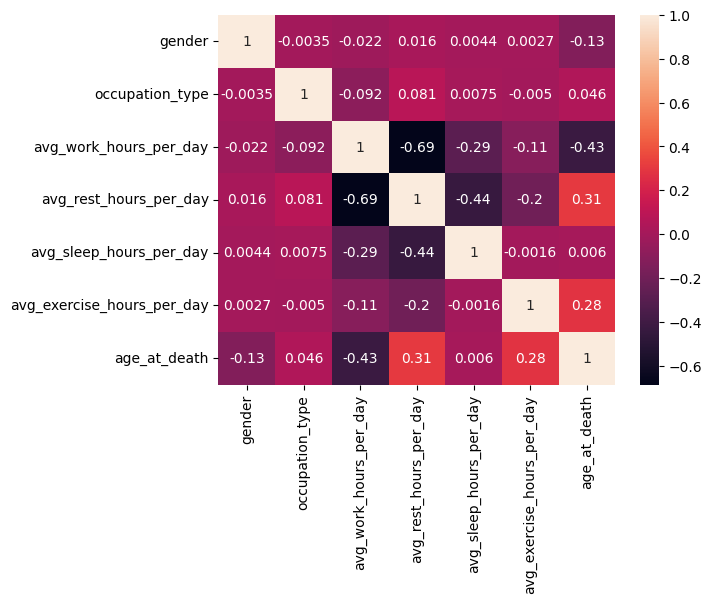

In [77]:
sns.heatmap(df.corr(), annot=True)

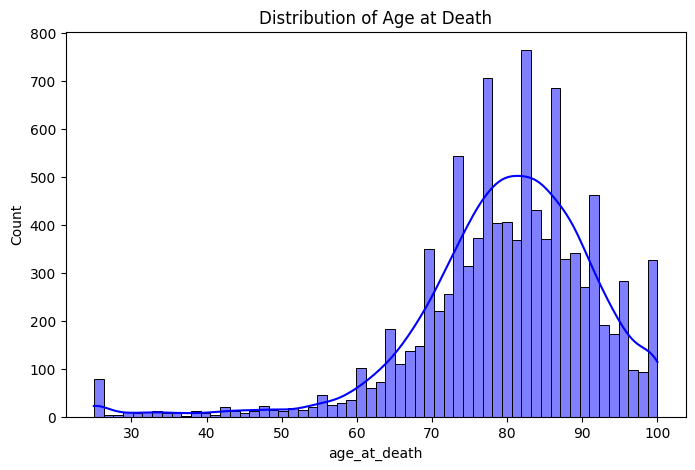

In [78]:
#Visualize the Target Variable
plt.figure(figsize=(8, 5))
sns.histplot(df['age_at_death'], kde=True, color='blue')
plt.title('Distribution of Age at Death')
plt.show()

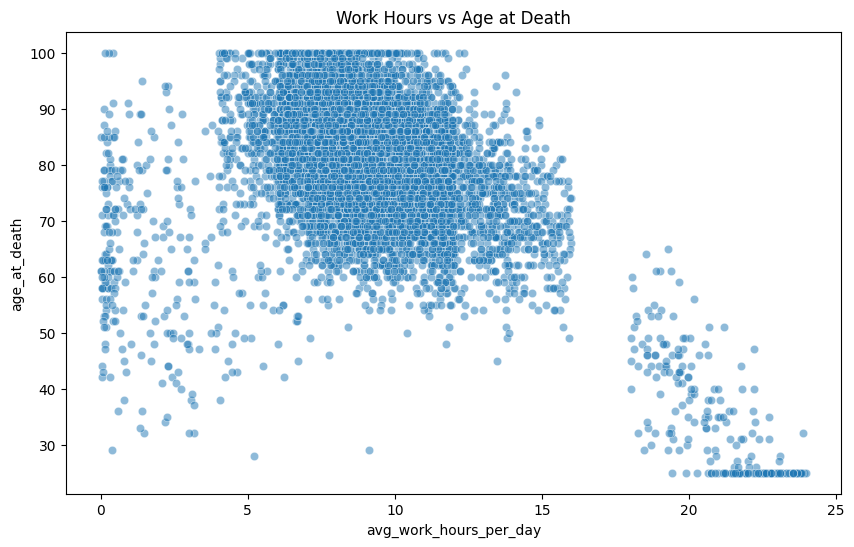

In [79]:
# This is our strongest correlation (-0.42). Let's see it visually.
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['avg_work_hours_per_day'], y=df['age_at_death'], alpha=0.5)
plt.title('Work Hours vs Age at Death')
plt.show()

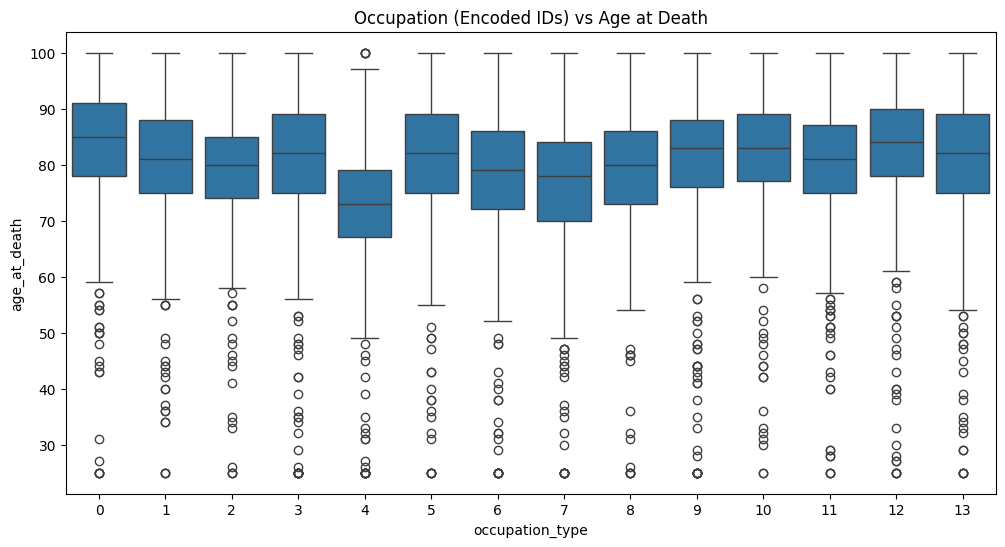

In [80]:
# This helps us see if certain "encoded" jobs have a different age range.
plt.figure(figsize=(12, 6))
sns.boxplot(x=df['occupation_type'], y=df['age_at_death'])
plt.title('Occupation (Encoded IDs) vs Age at Death')
plt.show()

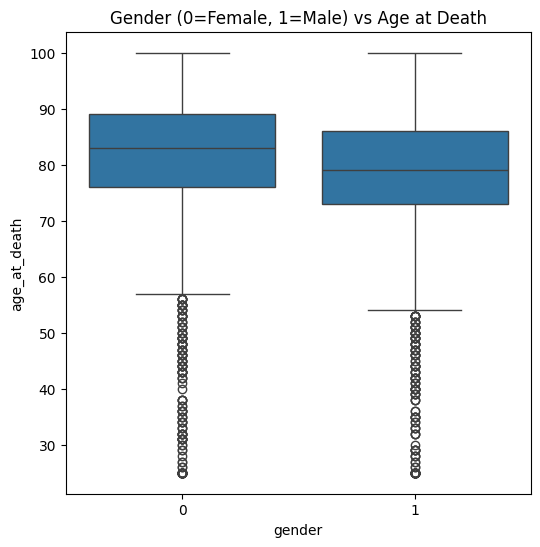

In [81]:
#Gender vs Age at Death
plt.figure(figsize=(6, 6))
sns.boxplot(x=df['gender'], y=df['age_at_death'])
plt.title('Gender (0=Female, 1=Male) vs Age at Death')
plt.show()

**Scatter Plot:** This confirms the negative correlation ($-0.42$). If this plot were just a flat horizontal blob, the model would fail. The fact that it has a direction means the Decision Tree can find split points

**Box Plots:** If the boxes are at different heights, it means your job title actually matters. The Tree will use this to branch out

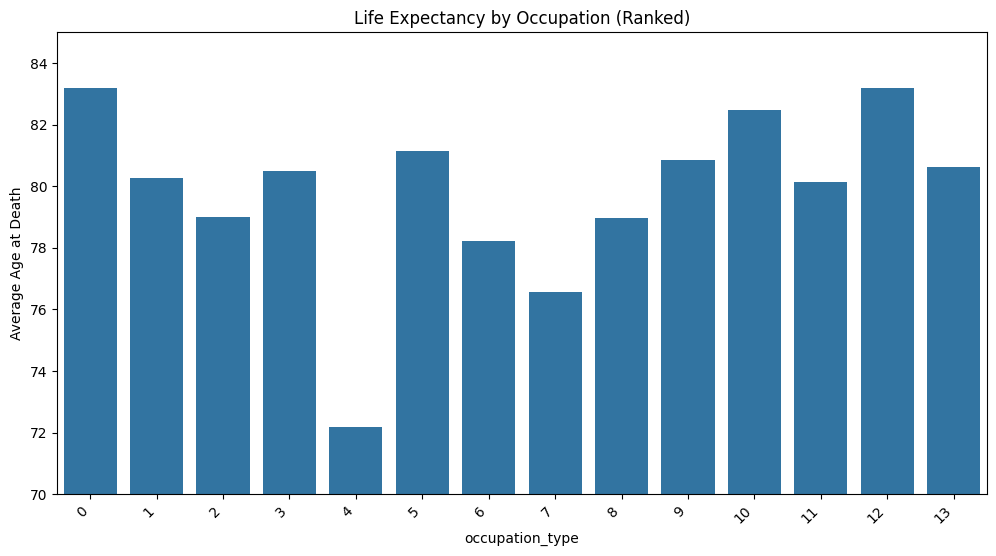

Top 3 Longest Living Jobs:
 occupation_type
10    82.462079
12    83.188482
0     83.193314
Name: age_at_death, dtype: float64
Bottom 3 Shortest Living Jobs:
 occupation_type
4    72.172911
7    76.556485
6    78.222720
Name: age_at_death, dtype: float64


In [88]:
#The "Best & Worst" Jobs?
avg_age_by_job = df.groupby('occupation_type')['age_at_death'].mean().sort_values()

plt.figure(figsize=(12, 6))
# We use the index (Job Names) for X and values (Age) for Y
sns.barplot(x=avg_age_by_job.index, y=avg_age_by_job.values)
plt.xticks(rotation=45, ha='right')
plt.ylim(70, 85) # Zoom in to see the differences clearly
plt.title("Life Expectancy by Occupation (Ranked)")
plt.ylabel("Average Age at Death")
plt.show()

print("Top 3 Longest Living Jobs:\n", avg_age_by_job.tail(3))
print("Bottom 3 Shortest Living Jobs:\n", avg_age_by_job.head(3))

Artist (0)

Consultant (1)

Driver (2)

Engineer (3)

Entrepreneur (4)

Freelancer (5)

Healthcare Worker (6)

Manager (7)

Manual Laborer (8)

Office Worker (9)

Retail Worker (10)

Scientist (11)

Teacher (12)

Technician (13)

It proves that Occupation is a predictor. There are some 10+ year gap between the lowest (Entrepreneur/Manager?) and highest (Artist/Teacher?) bars.

In [86]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a numeric copy just for this math
df_numeric = df.copy()
for col in ['gender', 'occupation_type']:
    df_numeric[col] = df_numeric[col].astype('category').cat.codes

# Drop target (age_at_death) to focus on features
features = df_numeric.drop(columns=['age_at_death', 'id'], errors='ignore')

# Calculate VIF
vif_data = pd.DataFrame()
vif_data["Feature"] = features.columns
vif_data["VIF Score"] = [variance_inflation_factor(features.values, i) for i in range(len(features.columns))]

print("\n--- VIF (Variance Inflation Factor) ---")
print("Scores > 5 or 10 indicate features are redundant/fighting each other.")
print(vif_data)


--- VIF (Variance Inflation Factor) ---
Scores > 5 or 10 indicate features are redundant/fighting each other.
                      Feature  VIF Score
0                      gender   1.961015
1             occupation_type   3.678954
2      avg_work_hours_per_day   5.517265
3      avg_rest_hours_per_day   3.171882
4     avg_sleep_hours_per_day   6.736842
5  avg_exercise_hours_per_day   3.043162


There are some scores that avg_work_hours and avg_rest_hours having high scores (maybe > 5). This tells us they are "collinear" (inverse of each other). It’s good to know because Linear Regression hates this, even though Decision Trees handle it fine.

#Model

In [89]:
df.columns

Index(['gender', 'occupation_type', 'avg_work_hours_per_day',
       'avg_rest_hours_per_day', 'avg_sleep_hours_per_day',
       'avg_exercise_hours_per_day', 'age_at_death'],
      dtype='object')

###Train-Test Split

In [91]:
from sklearn.model_selection import train_test_split

In [92]:
X = df.drop("age_at_death", axis = 1)
y = df["age_at_death"]

In [93]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

###Decision Tree Baseline

In [115]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [101]:
dt_model_b = DecisionTreeRegressor(random_state =42)

In [102]:
dt_model_b.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [103]:
y_pred = dt_model_b.predict(X_test)

print(f"MAE (Mean Absolute Error): {mean_absolute_error(y_test, y_pred):.2f}")
print(f"MSE (Mean Squared Error): {mean_squared_error(y_test, y_pred):.2f}")
print(f"R2 Score: {r2_score(y_test, y_pred):.2f}")

MAE (Mean Absolute Error): 9.08
MSE (Mean Squared Error): 130.95
R2 Score: 0.11


- R² Score of 0.11 means the model is barely better than just guessing the average age for everyone.

- By default, the tree grows as deep as it wants until it memorizes the noise in the training data (Overfitting). It fits the training examples perfectly but fails to generalize to new people.

###Decision Tree Hyperparameter

In [104]:
from sklearn.model_selection import GridSearchCV

In [105]:
param_grid = {
    'max_depth': [None, 5, 10, 15, 20],            # Control how deep the tree grows
    'min_samples_split': [2, 10, 20, 50],          # Minimum samples to create a split
    'min_samples_leaf': [1, 5, 10],                # Minimum samples in a final leaf node
    'criterion': ['squared_error', 'friedman_mse'] # The math used to measure quality
}

In [106]:
# cv=5 means "5-Fold Cross Validation" (splits data 5 different ways to be sure)
grid_search = GridSearchCV(DecisionTreeRegressor(random_state=42), param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

In [107]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['squared_error', 'friedman_mse'],
                         'max_depth': [None, 5, 10, 15, 20],
                         'min_samples_leaf': [1, 5, 10],
                         'min_samples_split': [2, 10, 20, 50]},
             scoring='neg_mean_squared_error')

In [112]:
grid_search.best_params_

{'criterion': 'squared_error',
 'max_depth': 10,
 'min_samples_leaf': 10,
 'min_samples_split': 50}

In [110]:
best_tree = grid_search.best_estimator_

In [113]:
y_pred_tuned = best_tree.predict(X_test)
print(f"\nTuned R2 Score: {r2_score(y_test, y_pred_tuned):.2f}")
print(f"Tuned MAE: {mean_absolute_error(y_test, y_pred_tuned):.2f}")
print(f"Tuned MSE: {mean_squared_error(y_test, y_pred_tuned):.2f}")


Tuned R2 Score: 0.54
Tuned MAE: 6.65
Tuned MSE: 68.21


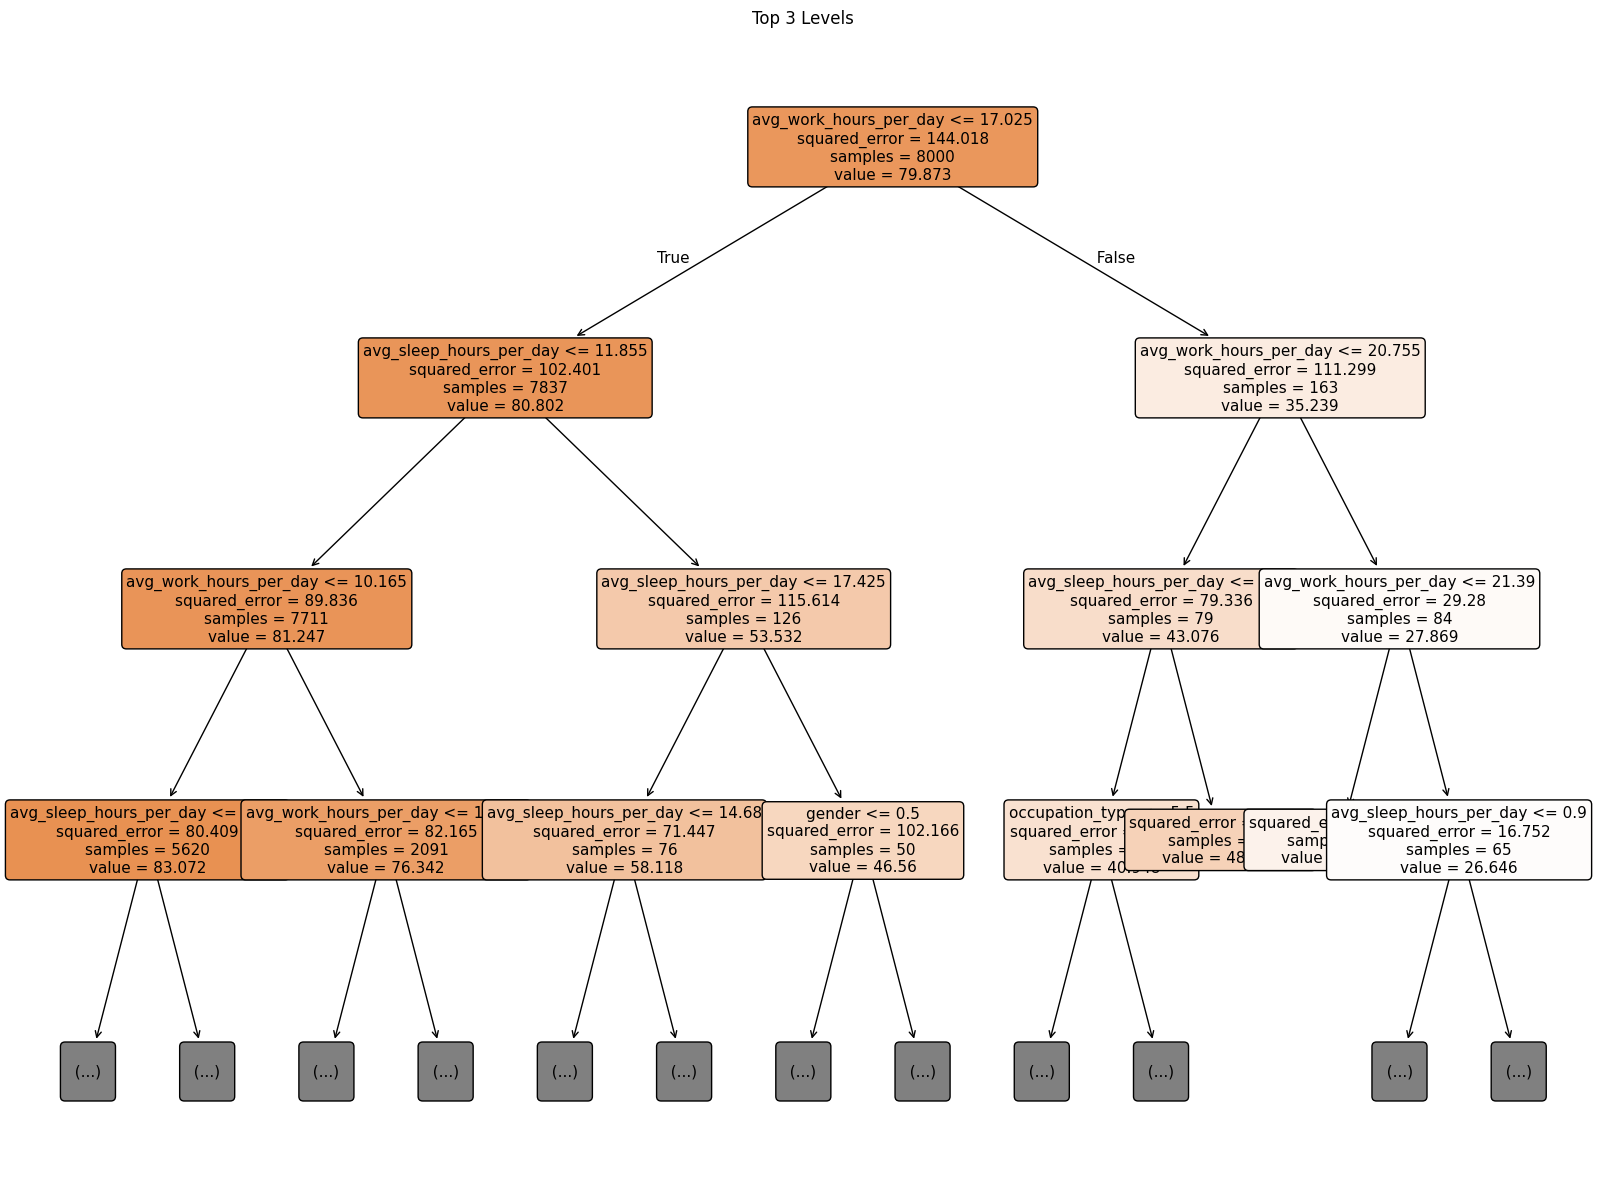

In [121]:
plt.figure(figsize=(20, 15))
plot_tree(best_tree,
          max_depth=3,               # Limit depth to 3 so text is readable
          feature_names=X.columns,   # Use column names (Work, Sleep, etc.)
          filled=True,               # Color the boxes
          rounded=True,              # Rounded corners
          fontsize=11)               # Text size
plt.title("Top 3 Levels")
plt.show()

###Linear Regression Baseline

In [124]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

In [130]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [131]:
lr_model_b = LinearRegression()
lr_model_b.fit(X_train_scaled, y_train)
y_pred_lr_b = lr_model_b.predict(X_test_scaled)

In [132]:
print("MAE", mean_absolute_error(y_test, y_pred_lr_b))
print("MSE", mean_squared_error(y_test, y_pred_lr_b))
print("R2 Score", r2_score(y_test, y_pred_lr_b))

MAE 7.772783479516702
MSE 105.03204207586776
R2 Score 0.285123798687835


###Linear Regression Hyperparameter Tuning

In [133]:
from sklearn.linear_model import Ridge

In [134]:
# We use Ridge because standard LinearRegression has no params to tune
param_grid_ridge = {
    'alpha': [0.1, 1.0, 10.0, 100.0],       # Strength of regularization
    'solver': ['auto', 'svd', 'cholesky']   # Math method to solve
}

In [135]:
grid_lr = GridSearchCV(Ridge(), param_grid_ridge, cv=5, scoring='r2')
grid_lr.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.1, 1.0, 10.0, 100.0],
                         'solver': ['auto', 'svd', 'cholesky']},
             scoring='r2')

In [137]:
best_lr = grid_lr.best_estimator_
y_pred_lr = best_lr.predict(X_test_scaled)

print("Best Params:", grid_lr.best_params_)
print(f"R2 Score: {r2_score(y_test, y_pred_lr):.4f}")
print(f"MAE: {mean_absolute_error(y_test, y_pred_lr):.4f}")

Best Params: {'alpha': 0.1, 'solver': 'svd'}
R2 Score: 0.2802
MAE: 7.7904


###SVR Baseline

In [139]:
from sklearn.svm import SVR

In [140]:
# We use a subset of data for SVR training to speed it up (SVR is slow on 10k rows)
# Taking first 2000 samples for training just to get a quick result
svr_model = SVR(C=10, kernel='rbf')
svr_model.fit(X_train_scaled[:2000], y_train[:2000])
y_pred_svr = svr_model.predict(X_test_scaled)

In [143]:
print("MAE", mean_absolute_error(y_test, y_pred_svr))
print("MSE", mean_squared_error(y_test, y_pred_svr))
print("R2 Score", r2_score(y_test, y_pred_svr))

MAE 6.585936802433678
MSE 66.64335458150612
R2 Score 0.5464074845701494


###SVR Hyperparameter Tuning

In [144]:
param_grid_svr = {
    'C': [1, 10, 100],            # Regularization parameter
    'gamma': ['scale', 0.01, 0.1], # Kernel coefficient
    'kernel': ['rbf']             # Radial Basis Function (Curves)
}

In [145]:
# We use a subset (first 2000 rows) for finding params to save time
# SVR is O(n^3), so 10k rows would take huge time in GridSearch

grid_svr = GridSearchCV(SVR(), param_grid_svr, cv=3, scoring='r2', n_jobs=-1)
grid_svr.fit(X_train_scaled[:2000], y_train[:2000])

GridSearchCV(cv=3, estimator=SVR(), n_jobs=-1,
             param_grid={'C': [1, 10, 100], 'gamma': ['scale', 0.01, 0.1],
                         'kernel': ['rbf']},
             scoring='r2')

In [ ]:
print("Best SVR Params Found:", grid_svr.best_params_)

In [146]:
# Train the WINNER on the FULL dataset
best_svr = SVR(**grid_svr.best_params_)
best_svr.fit(X_train_scaled, y_train)
y_pred_svr = best_svr.predict(X_test_scaled)

In [147]:
print(f"R2 Score: {r2_score(y_test, y_pred_svr):.4f}")
print(f"MAE: {mean_absolute_error(y_test, y_pred_svr):.4f}")

R2 Score: 0.5723
MAE: 6.4229


***Discussion***

Why is the limit 57%?

Despite our best efforts, we could not exceed an accuracy of 57%. There are three main reasons for this:

Missing Health Data: Longevity is heavily influenced by smoking, diet, genetics, and medical history. Our dataset only had "time-use" data (work/sleep hours), which is not enough to predict death perfectly.

Natural Randomness: Human life has a lot of "noise." Two people with the exact same habits will not die at the exact same age. Machine learning cannot predict this random variation.

Broad Categories: The "Occupation" column is too general. A "Manager" could be in a low-stress or high-stress environment, but the model sees them as the same.

***To improve*** the score further, gemini recommended using Ensemble Methods like Random Forest or XGBoost. These models combine hundreds of decision trees to correct errors.